# Neural Networks

If the basic technical ideas behind deep learning have been around for decades why are they only just now taking off?

Over the last 20 years for a lot of applications, we just accumulate a lot more <b>labelled</b> data more than traditional learning algorithms were able to effectively take advantage of.

![Deep Learning take off](../images/deep_learning/dl_takeoff.png)

## Introduction

The artificial neural networks are inspired by the brain. The brain contains a huge number of <b>neurons</b>, which are tiny individual processing units.  A single neuron by itself is relatively useless. These are combined with hundreds or thousands of other neurons. They receive a signal from other neurons through <b>dendrites</b>. If this signal is of considerable strength, the nucleus of the neuron decides to fire a respective output signal along the <b>axon</b>. This is further passed on to other neurons via axon terminals to dendrites of other neurons. The axon-dendrite connections are called as <b>synaptic connections</b>. <i>These synaptic connections are modifiable, meaning the strength of the connections may change based on the stimulus passed and get stronger if they are being used repeatedly.</i>

![Biological Neuron vs Artificial Neuron](../images/deep_learning/bion_vs_an.webp)

These immense connections is what makes the brain a completely different computational device as compared to everyday computers.

The interconnectivity produces relationships and results that frequently outperform any other machine learning methods. Hence, this has been mimicked therefore resulting in something called the <b>Artificial Neural Network (ANN)</b>.

![Artificial Neural Network](../images/deep_learning/ann.png)

<i>Neural networks are considered to be “black boxes” because we often have no idea why they reach the conclusions they do. We do understand how they do this, though.</i>

The dense layers, consists of interconnected neurons. In a dense layer, each neuron of a given layer is connected to every neuron of the next layer, which means that its output value becomes an input for the next neuron. This is similar to what we have seen in the case of a biological neural network.

Each connection between neurons has a weight associated with it, which is a trainable factor of how much of this input to use, and this weight gets multiplied by the input value. Once all of the inputs times weights flow into our neuron, they are summed, and a bias, another trainable parameter, is added. The purpose of the bias is to offset the
output positively or negatively.

Biases and weights are both tunable parameters, and both will impact the neurons’ outputs, but
they do so in different ways. Since weights are multiplied, they will only change the magnitude or
even completely flip the sign from positive to negative or vice versa.

$ Output = weight \cdot input + bias $ can be treated as the equation of the line i.e. $ y = mx + b $.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

Weight =  1
bias =  0


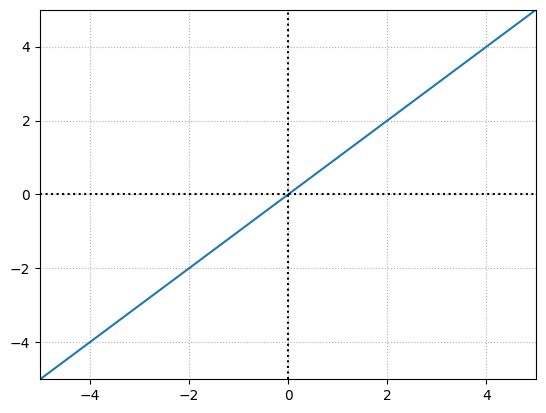

In [2]:
x = np.linspace(-100,100)
b = 0
m = 1
y = (m*x) + b

print("Weight = ", m)
print("bias = ", b)
plt.plot(x,y)
plt.grid(True,ls=':')
plt.axvline(x=0,color="k",ls=":")
plt.axhline(y=0,color="k",ls=":")
plt.grid(True)
plt.axis([-5,5,-5,5])
plt.show()

Adjusting the weight will impact the slope of the function:

Weight =  2
bias =  0


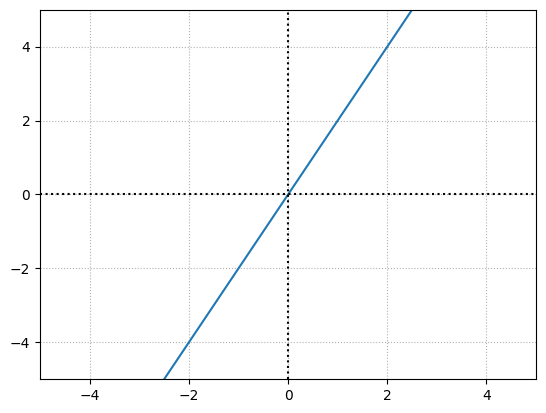

In [3]:
b = 0
m = 2
y = (m*x) + b

print("Weight = ", m)
print("bias = ", b)
plt.plot(x,y)
plt.grid(True,ls=':')
plt.axvline(x=0,color="k",ls=":")
plt.axhline(y=0,color="k",ls=":")
plt.grid(True)
plt.axis([-5,5,-5,5])
plt.show()

The bias offsets the overall
function. For example, with a weight of 1 and a bias of 2:

Weight =  2
bias =  2


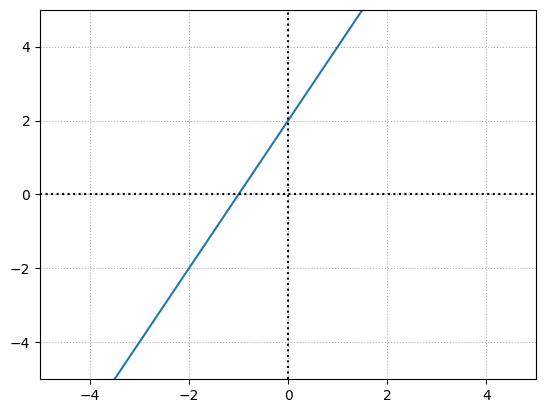

In [4]:
b = 2
m = 2
y = (m*x) + b

print("Weight = ", m)
print("bias = ", b)
plt.plot(x,y)
plt.grid(True,ls=':')
plt.axvline(x=0,color="k",ls=":")
plt.axhline(y=0,color="k",ls=":")
plt.grid(True)
plt.axis([-5,5,-5,5])
plt.show()

Weights and biases help to impact the outputs of neurons, but they do so in
slightly different ways.

We can mimic a neuron in the brain, either firing or not like an on-off switch using a step function.

\begin{equation}
y =
\left\{ \begin{aligned}
  1 \hspace{1cm} x > 0\\
  0 \hspace{1cm} x \le 0
\end{aligned} \right.
\end{equation}

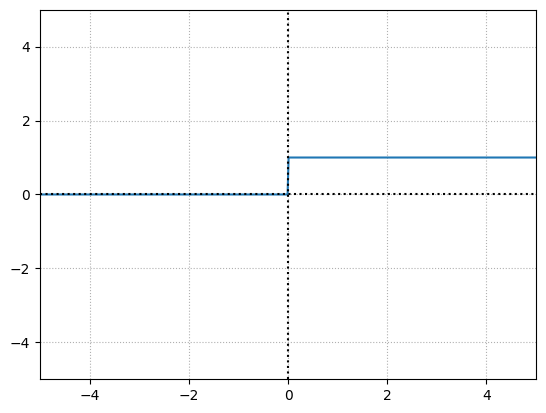

In [5]:
x = np.linspace(-100,100,10000)
# numpy heaviside can be used to create a step function where the 2nd arg is teh value to be used in case if its equal to
y = np.heaviside(x, 0)

plt.plot(x,y)
plt.grid(True,ls=':')
plt.axvline(x=0,color="k",ls=":")
plt.axhline(y=0,color="k",ls=":")
plt.grid(True)
plt.axis([-5,5,-5,5])
plt.show()

So, in this case if the neuron's output value which is calculated by $sum(inputs.weights) + bias$, is greater than $0$, then the neuron fires and the output would be $1$. Otherwise, it does not fire and pass along a $0$.

On this output we apply an activation function, something similar to the step function as seen earlier, although we shall use more informative activation functions which we shall discuss later.

Each neuron’s output could be a part of the ending output layer,
as well as the input to another layer of neurons.

![title](../images/deep_learning/basic_nn.png)

The <b>input layer</b> represents your actual input data, for example, pixel values from an image
or data from a temperature sensor. While this data can be “raw” in the exact form it was collected,
you will typically preprocess your data through functions like normalization and scaling, and
your input needs to be in numeric form.

The <b>output layer</b> is whatever the neural network returns. With classification, where we aim to predict the class of the input, the output layer often has as many neurons as the training dataset has classes, but can also have a single
output neuron for binary (two classes) classification.

The <b>parameters</b> are the weights and biases.

The end goal for neural networks is to adjust their weights and biases (the parameters), so when
applied to a yet-unseen example in the input, they produce the desired output. The goal is for the model to not only accurately predict on the training data, but also to be similarly accurate while predicting on the withheld out-of-sample validation data. This is called generalization, which means learning to fit the data instead of memorizing it.

## Coding our first neurons

### A Single Neuron

Let’s say we have a single neuron, and there are three inputs to this neuron. As in most cases,
when you initialize parameters in neural networks, our network will have weights initialized
randomly, and biases set as zero to start.

Each input also needs a weight associated with it. Weights are one of the types of values that change inside the model during the training phase, along with biases that also change during training. The values for weights and biases are
what get “trained,” and they are what make a model actually work.

At the moment, we’re modeling a single neuron with three inputs. Since
we’re modeling a single neuron, we only have one bias, as there’s just one bias value per neuron.
The bias is an additional tunable value but is not associated with any input in contrast to the
weights.

In [6]:
inputs = np.array([1,2,3])
weights = np.array([0.2,0.8,-0.5])
bias = 2

Each input is multiplied by it's input's weight, then adds the bias.

![title](../images/deep_learning/math_neuron.png)

To do this, we can perform dot product of 2 vectors. To know more go through the Linear Algebra section of this book.

In [7]:
np.dot(inputs,weights) + 2

2.3

### A Layer of Neurons

Neural networks typically have layers that consist of more than one neuron. Layers are nothing
more than groups of neurons. Each neuron in a layer takes exactly the same input — the input
given to the layer (which can be either the training data or the output from the previous layer),
but contains its own set of weights and its own bias, producing its own unique output.

![title](../images/deep_learning/layer_neurons.png)

We’ll keep the 4 inputs and 4 set of weights for the first neuron. We shall add 3 more set of weights for the 2 other neurons. the layer's output is going to be a list of 3 values, each per neuron.

In [8]:
inputs = np.array([1, 2, 3, 2.5])

weights1 = np.array([0.2, 0.8, -0.5, 1])
weights2 = np.array([0.5, -0.91, 0.26, -0.5])
weights3 = np.array([-0.26, -0.27, 0.17, 0.87])

bias1 = 2
bias2 = 3
bias3 = 0.5

![title](../images/deep_learning/layer_neurons_math.png)

In [9]:
print("neuron 1 = ",np.dot(inputs,weights1) + bias1)
print("neuron 2 = ",np.dot(inputs,weights2) + bias2)
print("neuron 3 = ",np.dot(inputs,weights3) + bias3)

neuron 1 =  4.8
neuron 2 =  1.21
neuron 3 =  2.385


In order to simplify the previous code, lets use a vector for inputs, matrix for the weights and a vector for biases for all the neurons. Remember that the below computation can be done with vectors instead of column vectors as well.

In [10]:
inputs = inputs.reshape(-1,1)
inputs

array([[1. ],
       [2. ],
       [3. ],
       [2.5]])

In [11]:
weights = np.matrix([[0.2, 0.8, -0.5, 1],[0.5, -0.91, 0.26, -0.5],[-0.26, -0.27, 0.17, 0.87]])
weights

matrix([[ 0.2 ,  0.8 , -0.5 ,  1.  ],
        [ 0.5 , -0.91,  0.26, -0.5 ],
        [-0.26, -0.27,  0.17,  0.87]])

In [12]:
biases = np.array([2,3,0.5]).reshape(-1,1)
biases

array([[2. ],
       [3. ],
       [0.5]])

In [13]:
np.dot(weights,inputs) + biases

matrix([[4.8  ],
        [1.21 ],
        [2.385]])

We have three sets of weights and three biases, which define three neurons. Each
neuron is “connected” to the same inputs. The difference is in the separate weights and bias
that each neuron applies to the input. This is called a <b>fully connected neural network</b> — every
neuron in the current layer has connections to every neuron from the previous layer. When you make a neural network
of your own, you also get to decide how many neurons you want for each of the layers. You can
combine however many inputs you are given with however many neurons that you desire.

### A batch of Data

To train, neural networks tend to receive data in batches. In the current implementation, the input has four values. Each of these values is a <b>feature observation datum</b>, and together they form a feature set instance, also called an <b>observation</b>, or most commonly, a <b>sample</b>.

Often, neural networks expect to take in many samples. If you fit (perform a step of a training process) on one
sample at a time, you’re highly likely to keep fitting to that individual sample, rather than
slowly producing general tweaks to weights and biases that fit the entire dataset. Fitting or
training in batches gives you a higher chance of making more meaningful changes to weights
and biases.

An example of a batch of data could look like:

In [14]:
batch = np.matrix(np.random.randint(0, 100, size=(8, 4)))
batch

matrix([[51, 92, 14, 71],
        [60, 20, 82, 86],
        [74, 74, 87, 99],
        [23,  2, 21, 52],
        [ 1, 87, 29, 37],
        [ 1, 63, 59, 20],
        [32, 75, 57, 21],
        [88, 48, 90, 58]])

where each row is a feature set or sample.

### A layer of neurons and batch of data

When inputs become a batch of inputs (a matrix), we need to perform the
matrix product. It takes all of the combinations of rows from the left matrix and columns from the
right matrix, performing the dot product on them and placing the results in an output array. Look into matrix multiplication in the Linear Algebra section of this book.

In [15]:
np.random.seed(1)
inputs = np.matrix(np.random.randint(0,10, size = (3,4)))
inputs

matrix([[5, 8, 9, 5],
        [0, 0, 1, 7],
        [6, 9, 2, 4]])

The input contains $4$ values for each of the row in the matrix. This means that we have $4$ input neurons.

In [16]:
biases = np.array([2,3,.5]).reshape(-1,1)
biases

array([[2. ],
       [3. ],
       [0.5]])

In [17]:
np.random.seed(1)
weights = np.matrix(np.random.uniform(-1, 1, size=(3, 4)))
weights

matrix([[-0.16595599,  0.44064899, -0.99977125, -0.39533485],
        [-0.70648822, -0.81532281, -0.62747958, -0.30887855],
        [-0.20646505,  0.07763347, -0.16161097,  0.370439  ]])

Each row is the weights assigned for each input for a specific neuron. We have $3$ rows that signifies that we have $3$ output neurons. In order to perform matrix multiplication, lets transpose the weights matrix such a way that, the first column is the weights associated to the first neuron and so on.

In [18]:
weights.transpose()

matrix([[-0.16595599, -0.70648822, -0.20646505],
        [ 0.44064899, -0.81532281,  0.07763347],
        [-0.99977125, -0.62747958, -0.16161097],
        [-0.39533485, -0.30887855,  0.370439  ]])

In [19]:
np.dot(inputs,weights.transpose()) + biases.transpose()

matrix([[ -6.27920358, -14.2467325 ,   0.48643875],
        [ -1.76711523,   0.2103706 ,   2.93146203],
        [  1.38922302, -11.06730794,   1.11844496]])

Each column in the matrix is the respective output for a given sample for the the first neuron. The above implementation can also be done with 2d and 1d arrays.

In [20]:
inputs = np.random.randint(0,10, size = (3,4))
weights = np.random.uniform(-1, 1, size=(3, 4))
biases = np.array([2,3,.5])
np.dot(inputs,weights.transpose()) + biases

array([[ 13.58621906,  -1.67576397,   5.13701575],
       [  4.29572857, -10.01346875,  -0.47708832],
       [ 15.52239525, -10.92554077,   2.96642479]])

## Adding Layers

Neural networks become “deep” when they have 2 or more hidden layers. Layers between the input and output layer endpoints have values that we don’t necessarily deal with, hence the name “hidden.”

In [21]:
inputs = np.array([[1, 2, 3, 2.5],
            [2., 5., -1., 2],
            [-1.5, 2.7, 3.3, -0.8]])
weights = np.array([[0.2, 0.8, -0.5, 1],
            [0.5, -0.91, 0.26, -0.5],
            [-0.26, -0.27, 0.17, 0.87]])
biases = np.array([2, 3, 0.5])

weights2 = np.array([[0.1, -0.14, 0.5],
            [-0.5, 0.12, -0.33],
            [-0.44, 0.73, -0.13]])
biases2 = np.array([-1, 2, -0.5])


As previously stated, inputs to layers are either inputs from the actual dataset you’re training with
or outputs from a previous layer. That’s why we defined 2 versions of weights and biases but only
1 of inputs — because the inputs for layer 2 will be the outputs from the previous layer.

In [22]:
layer1_outputs = np.dot(inputs,weights.transpose()) + biases
layer1_outputs

array([[ 4.8  ,  1.21 ,  2.385],
       [ 8.9  , -1.81 ,  0.2  ],
       [ 1.41 ,  1.051,  0.026]])

In [23]:
layer2_outputs = np.dot(layer1_outputs,weights2.transpose()) + biases2
layer2_outputs

array([[ 0.5031 , -1.04185, -2.03875],
       [ 0.2434 , -2.7332 , -5.7633 ],
       [-0.99314,  1.41254, -0.35655]])

At this point, our neural network could be visually represented as:

![title](../images/deep_learning/hidden_layers.png)

### Training Data

In [24]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

# The nnfs.init() does three things: it sets the random seed to 0 (by the default), creates a
# float32 dtype default, and overrides the original dot product from NumPy. All of these are meant
# to ensure repeatable results for following along.
nnfs.init()

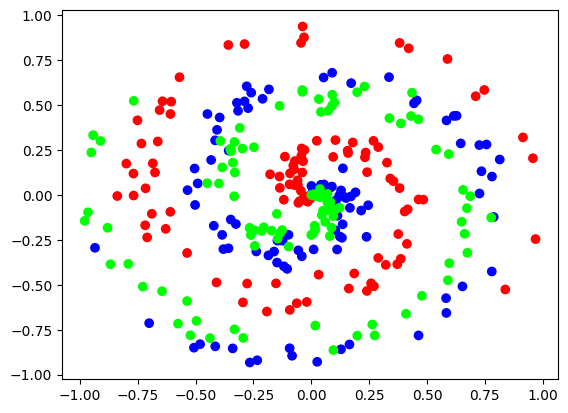

In [25]:
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

### Dense Layer Class

So far, we’ve only used what’s called a dense or
fully-connected layer. These layers are commonly referred to as “dense” layers in papers,
literature, and code, but you will occasionally see them called fully-connected.

In [26]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights randomly
        self.weights = 0.01 * np.random.randn(n_inputs,n_neurons)
        # Initialize biases for n_neurons to be 0
        self.biases = np.zeros((1,n_neurons))
    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs,self.weights) + self.biases

Some key points to observe:
1. As previously stated, weights are often initialized randomly for a model, but not always. It’s also possible that, even for a new model, you have some other initialization rules besides random.

2. Here, we’re setting weights to be random and biases to be 0. Note that we’re initializing weights
to be (inputs, neurons), rather than (neurons, inputs). We’re doing this ahead instead of
transposing every time we perform a forward pass.

3. It sometimes may be appropriate to initialize the biases to some
non-zero number, but the most common initialization for biases is 0. This will vary depending on your use-case and
is just one of many things you can tweak when trying to improve results. One situation where you
might want to try something else is with what’s called <b>dead neurons</b>.

4. It’s possible for $weights \cdot inputs + biases$ not to meet the threshold of the step function, which
means the neuron will output a $0$. It becomes a problem if this happens to this neuron for every one of the input samples. So, then this neuron’s $0$ output is the input to another neuron. Any weight
multiplied by zero will be zero. With an increasing number of neurons outputting $0$, more inputs
to the next neurons will receive these 0s rendering the network essentially non-trainable, or
“dead.”

5. We are multiplying the resultant weights generated from a gaussian distribution by 0.01 to generate numbers that are a couple of magnitudes smaller. This is because the model will take more time to fit the data during the training
process as starting values will be disproportionately large compared to the updates being made during training.

When we pass data through a model from beginning to end, this is called a <b>forward pass</b>. We will take the inputs or outputs of the previous layer, perform our calculation and update the output for the current layer.

In [27]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)
# Perform a forward pass of our training data through this layer
dense1.forward(X)
dense1.output[:5]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.11171044e-04, -5.11007493e-05, -1.12099799e-04],
       [ 2.99257295e-06, -2.69126613e-04, -1.45165104e-04],
       [ 8.95101766e-05, -4.30442247e-04, -1.68079801e-04],
       [-3.49893759e-04, -3.07208364e-04, -4.33002861e-04]], dtype=float32)

Each of those 3 values is the value from the 3 neurons in the <i>dense1</i> layer after passing in each of the samples.

## Activation Functions

The activation function is applied to the output
of a neuron (or layer of neurons), which modifies outputs. We use activation functions because if
the activation function itself is nonlinear, it allows for neural networks with usually two or more
hidden layers to map nonlinear functions.

In general, your neural network will have two types of activation functions. The first will be the
activation function used in hidden layers, and the second will be used in the output layer. Usually,
the activation function used for hidden neurons will be the same for all of them, but it doesn’t
have to.

### Linear Activation function

A linear function is simply the equation of a line. It will appear as a straight line when graphed,
where $y=x$ and the output value equals the input. This activation function is usually applied to the last layer’s output in the case of a regression model.

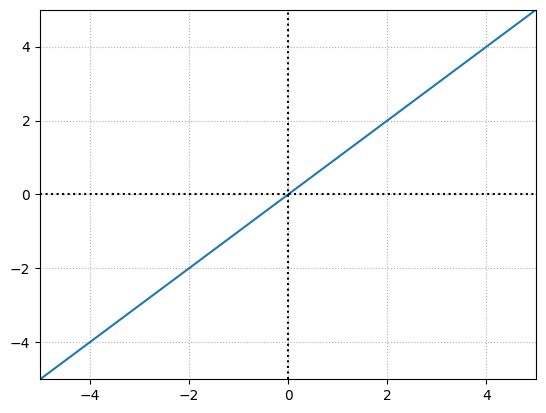

In [28]:
x = np.linspace(-100,100)
y = x

plt.plot(x,y)
plt.grid(True,ls=':')
plt.axvline(x=0,color="k",ls=":")
plt.axhline(y=0,color="k",ls=":")
plt.grid(True)
plt.axis([-5,5,-5,5])
plt.show()

### Sigmoid Activation Function

The problem with the step function is it’s not very informative. Its either $0$ or $1$, which makes it difficult to say by how much we have missed firing the respective neuron. In terms of the final output value from the network, it doesn’t matter if it was close to outputting something else. Thus, when it comes time to optimize weights and biases, it’s easier for the optimizer if we have activation functions that are more granular and informative.

The more granular step function for neural networks is the <b>Sigmoid</b> activation function.

$$
y = \frac{1}{1+e^{-x}}
$$

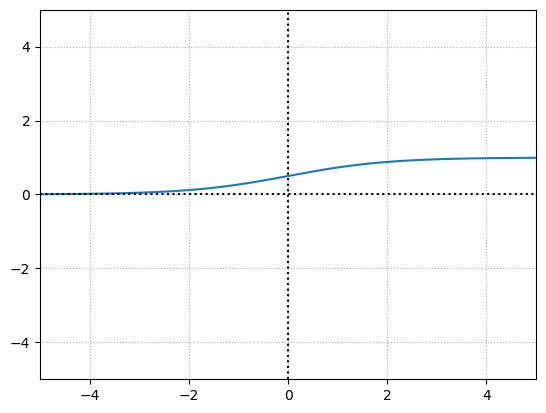

In [29]:
x = np.linspace(-100,100,10000)
y = 1/(1 + np.exp(-x))

plt.plot(x,y)
plt.grid(True,ls=':')
plt.axvline(x=0,color="k",ls=":")
plt.axhline(y=0,color="k",ls=":")
plt.grid(True)
plt.axis([-5,5,-5,5])
plt.show()

This function returns a value in the range of $0$ for negative infinity, through $0.5$ for the input of $0$,
and to $1$ for positive infinity.

The output from the Sigmoid function, being in the range of 0 to 1, also works better with neural networks — especially compared to the range of the negative to the positive infinity — and adds nonlinearity. The Sigmoid function, historically used in hidden layers, was eventually replaced by the <b>Rectified Linear Units</b> activation function (or <b>ReLU</b>)

### Rectified Linear Activation Function

The rectified linear activation function is $y=x$, clipped at 0 from the negative side. if $x$ is less than or equal to $0$ then $y$ is $0$ otherwise it is $x$.

\begin{equation}
y =
\left\{ \begin{aligned}
  x \hspace{1cm} x > 0\\
  0 \hspace{1cm} x \le 0
\end{aligned} \right.
\end{equation}

This simple yet powerful activation function is the most widely used activation function mainly due to speed and efficiency. The ReLU activation function is extremely close to being a linear activation
function while remaining nonlinear, due to that bend after 0. This simple property is, however,
very effective.

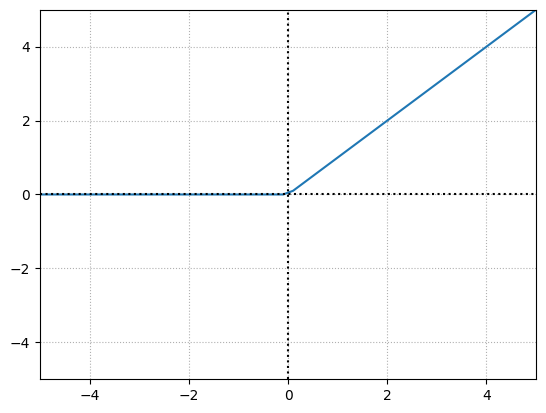

In [30]:
x = np.linspace(-100,100,1000)
y = np.maximum(x,0)

plt.plot(x,y)
plt.grid(True,ls=':')
plt.axvline(x=0,color="k",ls=":")
plt.axhline(y=0,color="k",ls=":")
plt.grid(True)
plt.axis([-5,5,-5,5])
plt.show()

### Why Use Activation Functions?

In most cases, for a neural network to fit a nonlinear function, we need it to contain two or more hidden layers, and
we need those hidden layers to use a nonlinear activation function.

A nonlinear function cannot be represented well by a straight line. For example a sine function cannot be represented well by a straight line.

Having no activation function at all means the output of the previous layer is the input of the current layer. This means the activation function is $y = x$ i.e. the linear activation function. No matter what we do with this neuron’s weights and biases, the output of this neuron will be perfectly linear to $y=x$ of the activation function. This linear nature will continue throughout the entire network.

Below we see an example, where for a specific neuron, a linear activation function is used.

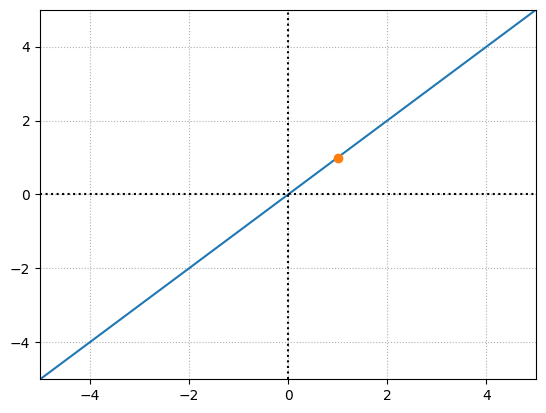

In [31]:
x = np.linspace(-100,100)
y = x

# positive output for a specific neuron
inputs = np.array([1,3,2])
weights = np.array([1,0,0])
bias = 0
output = np.dot(inputs,weights) + bias
y1 = output

plt.plot(x,y)
plt.plot(output,y1,'o')

plt.grid(True,ls=':')
plt.axvline(x=0,color="k",ls=":")
plt.axhline(y=0,color="k",ls=":")
plt.grid(True)
plt.axis([-5,5,-5,5])
plt.show()

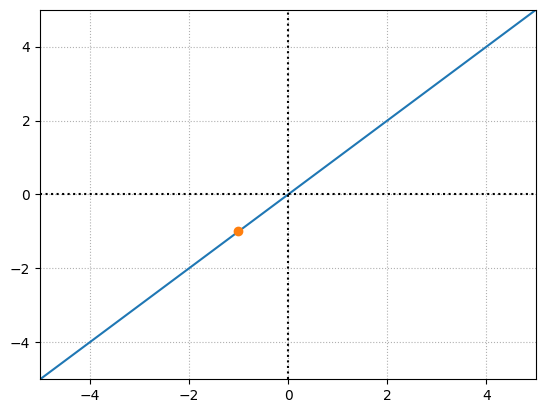

In [32]:
x = np.linspace(-100,100)
y = x

# negative output for a specific neuron
inputs = np.array([3,3,2])
weights = np.array([-1,0,0])
# add bias
bias = 2
output = np.dot(inputs,weights) + bias
y1 = output

plt.plot(x,y)
plt.plot(output,y1,'o')

plt.grid(True,ls=':')
plt.axvline(x=0,color="k",ls=":")
plt.axhline(y=0,color="k",ls=":")
plt.grid(True)
plt.axis([-5,5,-5,5])
plt.show()

No matter what we do, however many layers we have, this network can only depict linear
relationships if we use linear activation functions.

![A neural network with all linear activation functions](../images/deep_learning/linear_activation_network.png)

### ReLU Activation in a Pair of Neurons

Let's start with a single neuron with weight = $0$ and bias = $0$. For a given input ranging from -1 to 1 this is how the output of the $ReLU$ function looks like:

weight = 0
bias = 0


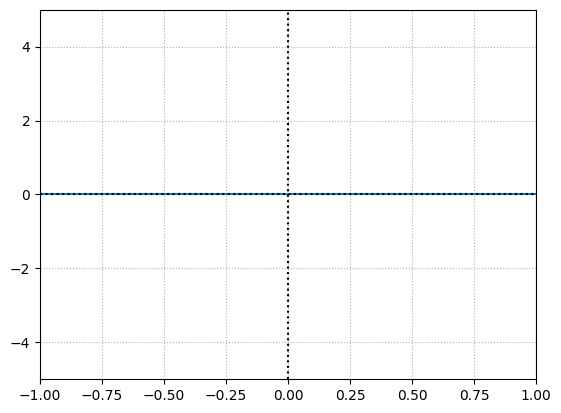

In [33]:
x = np.linspace(-1,1,100)
weight = 0
bias = 0
output = (x*weight) + bias
y = np.maximum(0,output)

print("weight =", weight)
print("bias =", bias)
plt.plot(x,y)

plt.grid(True,ls=':')
plt.axvline(x=0,color="k",ls=":")
plt.axhline(y=0,color="k",ls=":")
plt.grid(True)
plt.axis([-1,1,-5,5])
plt.show()

No matter what input we pass the output is going to be $0$ because when multiplied with weight i.e. $0$ results in $0$ and when added to the bias i.e. $0$ the output is $0$.

Now if we change the weight to $1$:

weight = 1
bias = 0


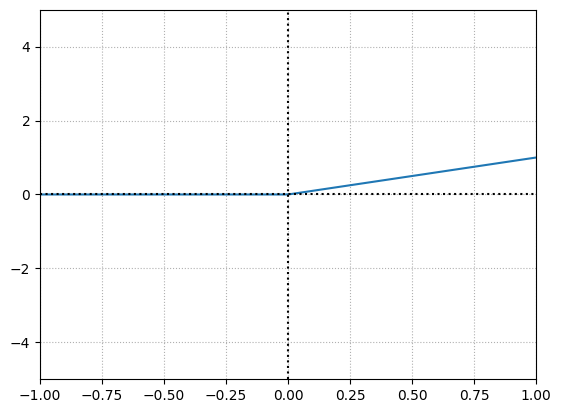

In [34]:
weight = 1
bias = 0
output = (x*weight) + bias
y = np.maximum(0,output)

print("weight =", weight)
print("bias =", bias)
plt.plot(x,y)

plt.grid(True,ls=':')
plt.axvline(x=0,color="k",ls=":")
plt.axhline(y=0,color="k",ls=":")
plt.grid(True)
plt.axis([-1,1,-5,5])
plt.show()

The output is simply just the input when the input is greater than $0$. It makes sense because we are multiplying by the weight i.e. $1$ which will output the input itself. Since the bias is $0$ when added makes no difference.

Now if we increase the bias to $0.50$, we will offset the  overall function's activation point. By increasing bias, we’re making this neuron activate earlier.

weight = 1
bias = 0.5


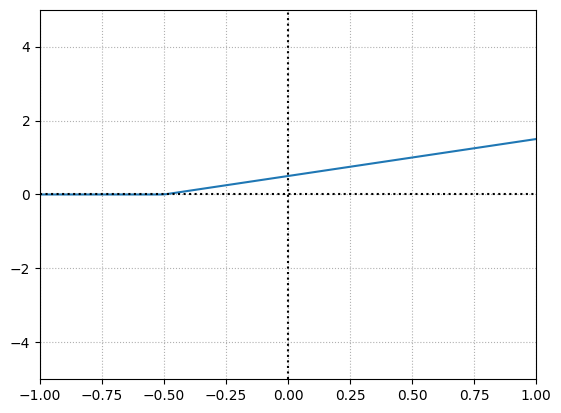

In [35]:
weight = 1
bias = 0.50
output = (x*weight) + bias
y = np.maximum(0,output)

print("weight =", weight)
print("bias =", bias)
plt.plot(x,y)

plt.grid(True,ls=':')
plt.axvline(x=0,color="k",ls=":")
plt.axhline(y=0,color="k",ls=":")
plt.grid(True)
plt.axis([-1,1,-5,5])
plt.show()

Let's make the weight negative.

weight = -1
bias = 0.5


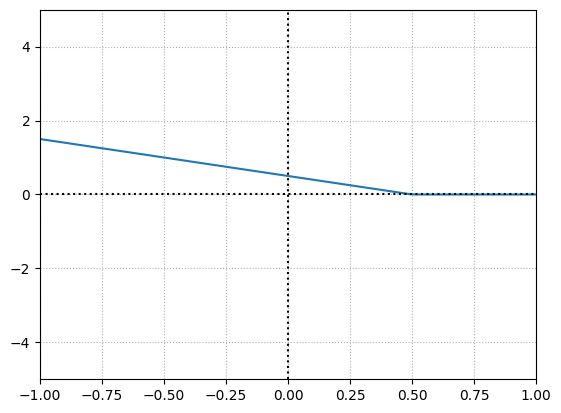

In [36]:
weight = -1
bias = 0.50
output = (x*weight) + bias
y = np.maximum(0,output)

print("weight =", weight)
print("bias =", bias)
plt.plot(x,y)

plt.grid(True,ls=':')
plt.axvline(x=0,color="k",ls=":")
plt.axhline(y=0,color="k",ls=":")
plt.grid(True)
plt.axis([-1,1,-5,5])
plt.show()

The function tells us now when the neuron gets deactivated for a given input. So we can use the weight to influence the slope and bias to offset the function horizontally and also capable of determining where the function gets activated and deactivated.

Now let's consider a pair of neurons rather than just one, where the output of the first neuron is the input for the second neuron as in the hidden layers.

Neuron1 weight = -1
Neuron1 bias = 0.5
Neuron2 weight = 1
Neuron2 bias = 0


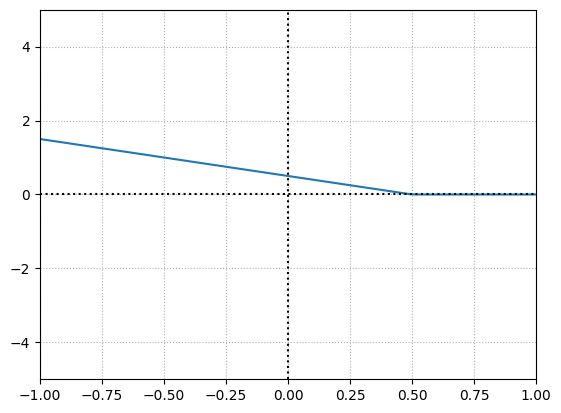

In [37]:
weight1 = -1
bias1 = 0.50
weight2 = 1
bias2 = 0

output1 = (x*weight1) + bias1
y1 = np.maximum(0,output1)
output2 = (y1*weight2) + bias2
y2 = np.maximum(0,output2)

print("Neuron1 weight =", weight1)
print("Neuron1 bias =", bias1)
print("Neuron2 weight =", weight2)
print("Neuron2 bias =", bias2)
plt.plot(x,y2)

plt.grid(True,ls=':')
plt.axvline(x=0,color="k",ls=":")
plt.axhline(y=0,color="k",ls=":")
plt.grid(True)
plt.axis([-1,1,-5,5])
plt.show()

There is no change because we chose the weight and bias to be $1$ and $0$, which means we are multiplying the output of the first neuron by $1$ and adding $0$, which is going to result in the output of the first neuron itself.

To offset this function, we shall change the parameters of the second neuron i.e. by changing bias to $1$ to offset the function by $1$ and keep the weight as it is.

Neuron1 weight = -1
Neuron1 bias = 0.5
Neuron2 weight = 1
Neuron2 bias = 1


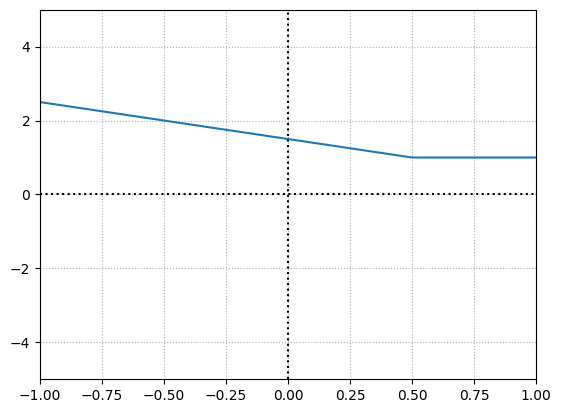

In [38]:
weight1 = -1
bias1 = 0.50
weight2 = 1
bias2 = 1

output1 = (x*weight1) + bias1
y1 = np.maximum(0,output1)
output2 = (y1*weight2) + bias2
y2 = np.maximum(0,output2)

print("Neuron1 weight =", weight1)
print("Neuron1 bias =", bias1)
print("Neuron2 weight =", weight2)
print("Neuron2 bias =", bias2)
plt.plot(x,y2)

plt.grid(True,ls=':')
plt.axvline(x=0,color="k",ls=":")
plt.axhline(y=0,color="k",ls=":")
plt.grid(True)
plt.axis([-1,1,-5,5])
plt.show()

What we have here is a neuron thats going to be active always no matter the input. So lets change the weight of this neuron to get a deactivation point.

Neuron1 weight = -1
Neuron1 bias = 0.5
Neuron2 weight = -2
Neuron2 bias = 1


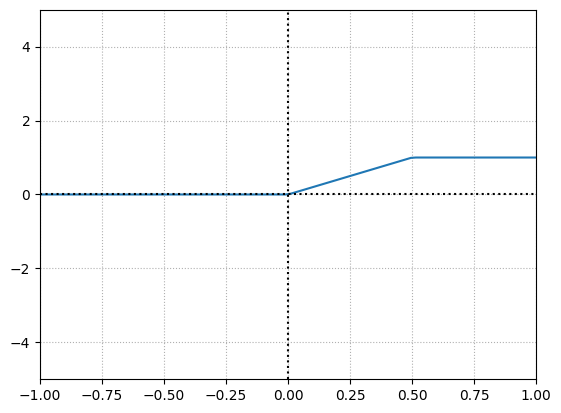

In [39]:
weight1 = -1
bias1 = 0.50
weight2 = -2
bias2 = 1

output1 = (x*weight1) + bias1
y1 = np.maximum(0,output1)
output2 = (y1*weight2) + bias2
y2 = np.maximum(0,output2)

print("Neuron1 weight =", weight1)
print("Neuron1 bias =", bias1)
print("Neuron2 weight =", weight2)
print("Neuron2 bias =", bias2)
plt.plot(x,y2)

plt.grid(True,ls=':')
plt.axvline(x=0,color="k",ls=":")
plt.axhline(y=0,color="k",ls=":")
plt.grid(True)
plt.axis([-1,1,-5,5])
plt.show()

![A neural network with all linear activation functions](../images/deep_learning/relu_activation_2layer.JPG)

When both neurons are activated, when their “area of effect” comes into play, they produce values in the range of the granular, variable, and output. If any neuron in the pair is inactive, the pair will produce non-variable output.

Below is the function for $ReLU$ activation function.

In [40]:
class Activation_ReLU:
    def forward(self,inputs):
        self.output = np.maximum(0,inputs)

In [41]:
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

In [42]:
# pass the output of the previous layer i.e. output of dense1
activation1.forward(dense1.output)
activation1.output[:5]

array([[0.000000e+00, 0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00],
       [2.992573e-06, 0.000000e+00, 0.000000e+00],
       [8.951018e-05, 0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00]], dtype=float32)

In [43]:
dense1.output[:5]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.11171044e-04, -5.11007493e-05, -1.12099799e-04],
       [ 2.99257295e-06, -2.69126613e-04, -1.45165104e-04],
       [ 8.95101766e-05, -4.30442247e-04, -1.68079801e-04],
       [-3.49893759e-04, -3.07208364e-04, -4.33002861e-04]], dtype=float32)

As you can see, negative values are clipped to 0.

### Softmax Activation Function

The rectified linear unit is unbounded, not normalized with other units, and exclusive.
1. Not normalized - The values can be anything, an output of $[12, 23, 341]$.
2. Exclusive - Each output is independent of others.

So there is no relative comparison we can make. Also when the values are similar with slight difference in magnitude, its difficult to distinguish or know how wrong the values are.

The softmax activation on the output data can take in non-normalized, or uncalibrated, inputs and
produce a normalized distribution of probabilities for our classes. In the case of classification,
what we want to see is a prediction of which class the network “thinks” the input represents.

<b>This distribution returned by the softmax activation function represents confidence scores for each
class and will add up to 1. The predicted class is associated with the output neuron that returned
the largest confidence score.</b>
For example, if our network has a confidence distribution for two classes: $[0.45, 0.55]$, the prediction is the 2nd class, but the confidence in this prediction isn’t very high.

$$\sigma(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_k}}$$

where $\mathbf{z}$ is the input vector, consisting of $K$ real numbers and $e$ is the standard exponential function ($e$ is eulers number that is roughly 2.71828182846). In simple terms, the softmax function takes in a vector of values, applies the exponential function to each value, and normalizes these values by dividing by the sum of all these exponentials.

Exponentiation serves multiple purposes:
1. To get probabilities we need non negative values. If our output looks like $[4.8, 1.21, -2.385]$ — even after normalization, the last
value will still be negative since we’ll just divide all of them by their sum. An exponential value of any number is always
non-negative — it returns 0 for negative infinity, 1 for the input of 0, and increases for positive
values:

$$y = e^x$$

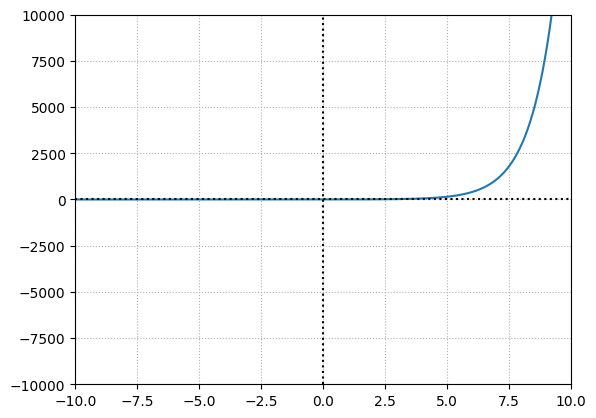

In [44]:
x = np.linspace(-10,10,1000)
y = np.exp(x)
plt.plot(x,y)

plt.grid(True,ls=':')
plt.axvline(x=0,color="k",ls=":")
plt.axhline(y=0,color="k",ls=":")
plt.grid(True)
plt.axis([-10,10,-10000,10000])
plt.show()

2. With higher input values, outputs are also higher, so we won’t change the predicted class after applying it while making
sure that we get non-negative values. It also adds stability to the result as the normalized
exponentiation is more about the difference between numbers than their magnitudes. For example consider the outputs to be $[1, 3, 16]$.
Applying normalization results in $[0.05, 0.15, 0.8]$. As you can see the highest value is magnitudes larger from other values. Along With exponentiation, the difference becomes even more evident. This is exactly what we want in a classification setting. Also the technique of normalization converts exponentiated values to a probability distribution.

<b>A key point to remember is, as the input value increases, the exponentiated value gets very large and an overflow error is thrown as shown below:</b>

In [45]:
try:
    np.exp(1000)
except Exception as e:
    print(e)

C:\Users\434386\AppData\Local\Temp\ipykernel_26732\2354077136.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(1000)


We know the exponential function tends toward $0$ as its input value approaches negative infinity, and
the output is $1$ when the input is $0$. We can use this property to our advantage, where we can subtract all the values in our input vector with the maximum value in that vector, which would then change the output values
to always be in a range from some negative value up to $0$, as the largest number subtracted by
itself returns $0$, and any smaller number subtracted by it will result in a negative number - exactly the range discussed above.

In [46]:
class Activation_Softmax:
    def forward(self,inputs):
        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,keepdims=True)

        self.output = probabilities

After applying softmax, to determine which classification the
model has chosen to be the prediction, we perform an $argmax$ on these outputs, which checks
which of the classes in the output distribution has the highest confidence and returns its index -
the predicted class index.

## Calculating Network Error with Loss

The end goal of building a neural network is to train a model over time by tweaking the weights and biases that will improve the model's accuracy and confidence in performing the respective task. To do this, we must calculate how much error the model has.

The <b>loss function</b> also referred to as the <b>cost function</b> is the algorithm that quantifies how wrong a model is.
Since loss is the model's error, we ideally want it to be 0.

We cannot calculate error of a model based on $argmax$, because if we have 2 output vectors $[0.22, 0.6, 0.18]$ vs $[0.32, 0.36, 0.32]$, the middle one is the correct class in both the cases. But these 2 values are not as accurate as each other because accuracy is simply applying $argmax$ to the output to find the biggest value. This does not tell us how confident we are in our prediction. The output of a neural network is actually confidence, and more confidence in the correct answer is better. So we strive to increase correct confidence and decrease misplaced confidence.

### Categorical Cross-Entropy Loss

Categorical cross-entropy is used to compare the <i>ground-truth</i> probability and some <i>predicted</i> probability distribution. It is most commonly used loss functions with a softmax activation function on the output layer. Hence it is also known as <b>Softmax Loss</b>.

In the case when Softmax is not applied on the output, it is known as <b>Cross-Entropy loss</b>. Logistic Loss and Multinomial Logistic Loss are other names for Cross-Entropy loss. In the case where Sigmoid activation is used before using Cross-Entropy loss, it is called as Binary Cross-Entropy loss or Sigmoid Cross-Entropy loss.

$$L_i = -\sum_{j}y_{ij}\log(\hat{y_{ij}})$$

where $L_i$ represents the loss value, $i$ is the $i^{th}$ sample in a dataset, $j$ is the index of the output vector $y$ which has the target values and $\hat{y}$ represents the predicted values.

for example, if we are working on predicting a class out of 3 classes, we will have 3 class confidences after softmax activation eg. $[0.7, 0.1, 0.2]$. Assuming that the desired prediction is the first class or index 0, the desired probability distribution is $[1, 0, 0]$ i.e. the desired probabilities will consist of $1$ in the desired class, and $0$ in the remaining undesired classes. These kind of vectors are called <b>one-hot</b>.

$$L_i = -\sum_{j}y_{ij}\log(\hat{y_{ij}})= -(1\cdot\log(0.7) + 0\cdot\log(0.1) + 0\cdot\log(0.2))$$

Since the one-hot vector zero out part of the equation and only considers the log of the desired class, the equation can be simplified to

$$L_i = -\log(\hat{y_{ik}})$$

where $k$ is the index of the "true" probability or groundtruth label.

In the example used earlier, $[0.22, 0.6, 0.18]$ vs $[0.32, 0.36, 0.32]$ are 2 output vectors after applying softmax. We can observe that $argmax$ of these output vectors is the same i.e. index 2, although the confidence is different i.e. 0.6 and 0.36. Categorical Cross-Entropy Loss accounts for that and outputs a larger loss if the confidence is lower. To see that, lets apply log of the values 0.6 and 0.36.

In [47]:
print("log(1) = ",np.log(1))
print("log(0.6) = ",np.log(0.6))
print("log(0.36) = ",np.log(0.36))

log(1) =  0.0
log(0.6) =  -0.5108256237659907
log(0.36) =  -1.0216512475319814


As we can see, if the confidence level equals $1$, meaning we are 100% sure, the loss is $0$. Loss value raises, as we approach $0$. What we are doing is simply find $x$ based on $e^x = value$ where value is our predicted confidence.

Remember in the softmax output, we have values ranging from $0$ to $1$. This is a problem because $\log(0) = e^x = 0$ and the constant $e$ to any power is always a positive number and there is not $x$ that will result in $0$. Hence, this is undefined.

In [48]:
# in general log(0) is undefined
try:
    np.log(0)
except Exception as e:
    print(e)

C:\Users\434386\AppData\Local\Temp\ipykernel_26732\4274646763.py:3: RuntimeWarning: divide by zero encountered in log
  np.log(0)


Since this is undefined, we have to find a value very close to 0. This is given by solving:

$$\lim_{x\to 0^+} log(x) = -\infty$$

A quick work around is to clip a very small value to the confidence to prevent it from being a 0 i.e. the lowest possible value becomes $1e-7$ and the highest possible values becomes $1-1e-7$ slightly less than $1$.

In [49]:
x = np.array([1.38879439e-11, 1.52299797e-08, 1.00000000e+00])
x_clipped = np.clip(x,1e-7,1-1e-7)

print('Example output = ', x)
print('Clipped output = ', x_clipped)

Example output =  [1.38879439e-11 1.52299797e-08 1.00000000e+00]
Clipped output =  [1.000000e-07 1.000000e-07 9.999999e-01]


The idea now, would be to take in a batch of outputs, and compute the average loss per batch i.e. take the mean of the loss per each batch. As we have seen earlier, that the target values can be one-hot encoded or just sparse vector with the target labels, we shall support to allow both kind of inputs for the target class vector in our loss function.

In [50]:
class Loss:
    # provide the model output and groundtruth
    def calculate(self,output,y):
        sample_losses = self.forward(output,y)
        data_loss = np.mean(sample_losses)
        return data_loss

class Loss_CategoricalcrossEntropy(Loss):

    def forward(self, y_pred, y_true):
        # number of samples in a batch
        samples = len(y_pred)
        # clip the data to prevent having 0 values which raises an error (log(0))
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)
        # check if the target vector passed is one hot encoded or not
        if len(y_true.shape) == 1:
            # get the confidence we got for the corresponding desired target in the current set of samples
            correct_confidences = y_pred_clipped[range(samples),y_true]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis = 1)

        # take the log of the confidences
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods


Along with loss, we can also compute accuracy, which describes how often the largest confidence is the correct class.

In [51]:
class Accuracy:
    def calculate(self,y_pred,y_true):
        # get the index of the maximum confidence
        predictions = np.argmax(y_pred, axis = 1)
        if len(y_true.shape) == 2:
            # get the index of the groundtruth
            y_true = np.argmax(y_true, axis = 1)
        # check the number of times we have predicted the ground truth correctly
        self.accuracy = np.mean(predictions == y)

## Introducing Optimization

The next step in the process of building a neural network is to adjust the weights and biases to decrease the loss.

## Derivatives

### The Numerical Derivative

Randomly changing and searching for optimal weights and biases is not an efficient or fruitful procedure because the possible combinations of weights and biases is infinite. Inputs, weights and biases and the layers, all of these have an impact on the loss. We have to calculate how much each singular weight and bias changes the loss value given a sample, and see how we can decrease the loss. Lets start from the basics to understand how to do this.

Lets plot a simple function

x =  [0. 1. 2. 3. 4.]
y =  [0. 2. 4. 6. 8.]


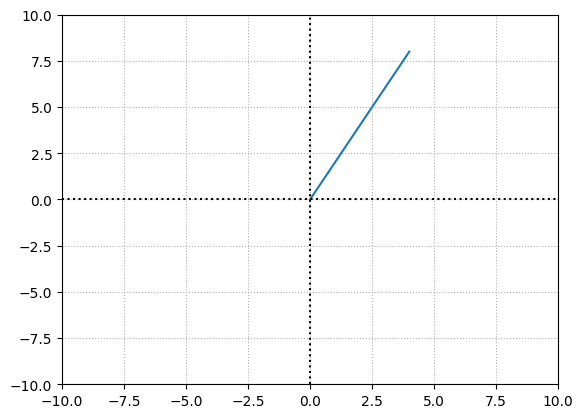

In [52]:
def f(x):
    return 2*x

x = np.linspace(0,4,5)
y = f(x)

print("x = ",x)
print("y = ",y)
plt.plot(x,y)

plt.grid(True,ls=':')
plt.axvline(x=0,color="k",ls=":")
plt.axhline(y=0,color="k",ls=":")
plt.grid(True)
plt.axis([-10,10,-10,10])
plt.show()

One can understand the impact of $x$ over $y$ in a linear function using <b>slope</b> that describes the rise over run. The slope of a line is

$$
\frac{Change \hspace {0.1 cm} in \hspace {0.1 cm} y}{Change \hspace {0.1 cm} in \hspace {0.1 cm} x} = \frac{\Delta y}{\Delta x}
$$

To find the change in $y$ over $x$, we can take any $2$ $(x,y)$ points on the line and find the slope.

$$
(x_1,y_1) = (1,2) \\
(x_2,y_2) = (2,4) \\
\Delta y = y_2 - y_1 = 4 - 2 = 2 \\
\Delta x = x_2 - x_1 = 2 - 1 = 1 \\
slope = \frac{\Delta y}{\Delta x} = 2
$$

In [53]:
delta_y = y[2] - y[1]
delta_x = x[2] - x[1]
print("slope = ", delta_y/delta_x)

slope =  2.0


Let's do this for a non-linear function $f(x) = 2x^2$ which is a parabolic function.

x =  [-4.         -3.11111111 -2.22222222 -1.33333333 -0.44444444  0.44444444
  1.33333333  2.22222222  3.11111111  4.        ]
y =  [32.         19.35802469  9.87654321  3.55555556  0.39506173  0.39506173
  3.55555556  9.87654321 19.35802469 32.        ]


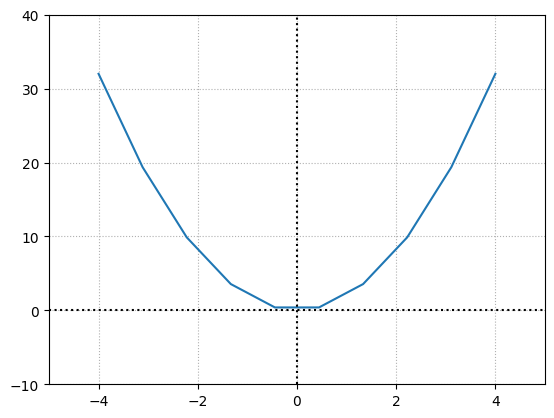

In [54]:
def f(x):
    return 2*x ** 2

x = np.linspace(-4,4,10)
y = f(x)

print("x = ",x)
print("y = ",y)
plt.plot(x,y)

plt.grid(True,ls=':')
plt.axvline(x=0,color="k",ls=":")
plt.axhline(y=0,color="k",ls=":")
plt.grid(True)
plt.axis([-5,5,-10,40])
plt.show()

<b> The slope of this function changes w.r.t the points we choose resulting in varying slopes</b>.
Calculus proposes that we measure the slope of the tangent at a given point at $x$ giving us the <b>instantaneous slope</b> or the slope at this point, which is the <b>derivative</b>. The tangent is created by drawing a line between 2 points that are infinitely close. This means that we should have a curve that is differentiable meaning it should be continuous and smooth i.e. not have a sharp corner.

We can approximate the derivative at $x$ by taking a point and adding a very small delta such as $0.0001$. The idea of taking $2$ infinitely close points to calculate the derivative is called <b>numerical differentiation</b>.

In [55]:
x1 = 1
x2 = x1 + 0.0001

y1 = f(x1)
y2 = f(x2)

delta_y = y2-y1
delta_x = x2-x1

print("x1 = ",x1)
print("y1 = ",y1)
print("x2 + delta = ",x2)
print("y2 = ",y2)
print('slope = ',delta_y/delta_x)

x1 =  1
y1 =  2
x2 + delta =  1.0001
y2 =  2.00040002
slope =  4.0001999999987845


The derivative of $2x^2$ at $x=1$ is exactly $4$. The delta is small to approximate but large enough to prevent a rounding error.

We can do this for multiple points on the curve, by making the curve more granular using numpy arange and drawing the tangent lines at a point. The function for a tangent line is a straight line i.e. $y = mx +b$. Where $m$ is the slope or approximative derivative and $b$ is the intercept of $y$. We have $x$, $y$ and $m$, so to find $b$
$$
b = y - mx
$$

with the help of this we shall plot a straight line for our tangent line.

x1, y1 = (2,8)
x2, y2 = (2.0001,8.000800020000002)


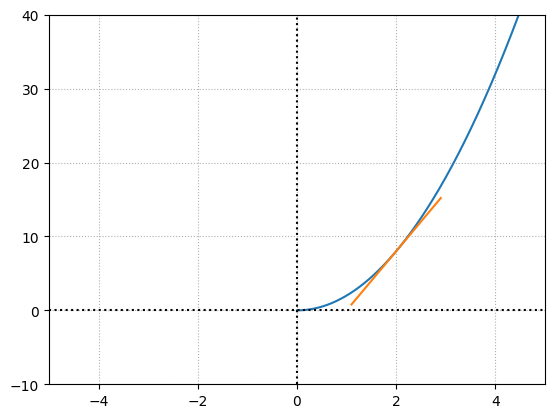

In [56]:
# create a continuous curve using a very small step
x = np.arange(0,5,0.0001)
y = f(x)
# delta for approximating slope at a given point
delta = 0.0001

x1 = 2
y1 = f(2)
x2 = x1 + delta
y2 = f(x2)

# derivative approximation
slope = (y2-y1)/(x2-x1)
# find the intercept
b = y2 - slope*x2
# function that takes in x, slope and intercept
def tangent_line(x,slope,b):
    return slope*x + b

print(f"x1, y1 = ({x1},{y1})")
print(f"x2, y2 = ({x2},{y2})")
plt.plot(x,y)

x_tangent = [x1-0.9,x1,x1+0.9]
plt.plot(x_tangent, [tangent_line(x,slope,b) for x in x_tangent])

plt.grid(True,ls=':')
plt.axvline(x=0,color="k",ls=":")
plt.axhline(y=0,color="k",ls=":")
plt.grid(True)
plt.axis([-5,5,-10,40])
plt.show()

The above plot shows us the slope of the tangent line at a given point. What we care about is the slope of this line rather than the tangent line itself. The slope is what we are going to use further to understand the impact $x$ has on the function at a particular point, referred to as the <b>instantaneous rate of change</b>. We will use this concept to determine the effect of a specific weight or bias on the overall loss function given a sample. In simple terms, for a given set of weights and biases, we will find the slope of the tangent for the given input (in this case $x$) on our loss function (in this case $f(x)$).

Below we can see different tangent lines for different values of $x$.

x1, y1 = (0,0)
x2, y2 = (0.0001,2e-08)
Approximate derivative = 0.00019999999999999998 

x1, y1 = (1,2)
x2, y2 = (1.0001,2.00040002)
Approximate derivative = 4.0001999999987845 

x1, y1 = (2,8)
x2, y2 = (2.0001,8.000800020000002)
Approximate derivative = 8.000199999998785 

x1, y1 = (3,18)
x2, y2 = (3.0001,18.001200020000002)
Approximate derivative = 12.000199999998785 

x1, y1 = (4,32)
x2, y2 = (4.0001,32.00160002)
Approximate derivative = 16.000200000016548 



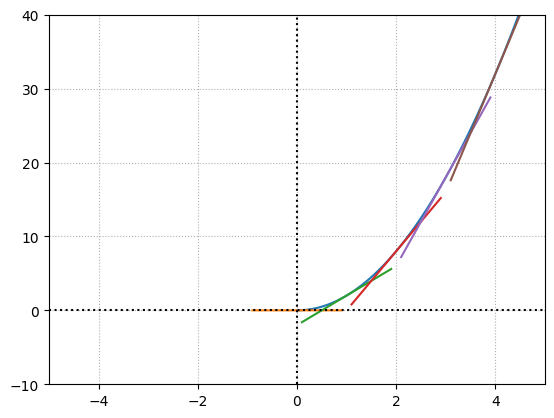

In [57]:
# create a continuous curve using a very small step
x = np.arange(0,5,0.0001)
y = f(x)
# delta for approximating slope at a given point
delta = 0.0001

plt.plot(x,y)

for i in range(5):
    x1 = i
    y1 = f(x1)
    x2 = x1 + delta
    y2 = f(x2)

    # derivative approximation
    slope = (y2-y1)/(x2-x1)
    # find the intercept
    b = y2 - slope*x2

    print(f"x1, y1 = ({x1},{y1})")
    print(f"x2, y2 = ({x2},{y2})")
    print("Approximate derivative =",slope,"\n")

    x_tangent = [x1-0.9,x1,x1+0.9]
    plt.plot(x_tangent, [tangent_line(x,slope,b) for x in x_tangent])

plt.grid(True,ls=':')
plt.axvline(x=0,color="k",ls=":")
plt.axhline(y=0,color="k",ls=":")
plt.grid(True)
plt.axis([-5,5,-10,40])
plt.show()

The loss function contains all the layers, weights and biases which is a massive function operating in multiple dimensions. Calculating derivatives using numerical differentiation is a complex and tedious task. This is a brute force approach.

<b>The derivative is the slope of the tangent line for a function that takes a single parameter as an input</b>. We will extend this concept to calculate the slopes of the loss function at each weight and bias points which is a multivariate function (<i>which is a function that takes multiple parameters</i>).

### The Analytical Derivative

The derivative of a function $f(x)$ can be represented as $f'(x)$ (we add a prime '). Another notation we can use is called the leibniz's notation.

$$
f'(x) = \frac{d}{dx}f(x) = \frac{df}{dx}(x) = \frac{df(x)}{dx}
$$

<b>The derivative of a constant function:</b>

$$
f(x) = 1 \rightarrow \frac{d}{dx}f(x) = \frac{d}{dx}1 = 0
$$

$$
f'(x) = 0
$$

The derivative is $0$ because intuitively, the function takes any value for $x$ but the outout for $y$ is always $1$. So the change in $y$ w.r.t $x$ is $0$.

<b>The derivative of a linear function is</b>

$$
f(x) = x \rightarrow \frac{d}{dx}f(x) = \frac{d}{dx}x = \frac{d}{dx}x^1 = 1 \cdot x^{1-1} = 1
$$

$$
f'(x) = 1
$$

The intuition behind this is that for every change in $x, y$ changes by the same amount.

<b>The derivative of $f(x) = 2x$ is</b>

\begin{equation}
\begin{split}
f(x) & = 2x \rightarrow \frac{d}{dx}f(x) \\
& = \frac{d}{dx}2x^1 \\
& = 2 \frac{d}{dx}x^1 \\
& = 2 \cdot 1 \cdot x^{1-1} \\
& = 2
\end{split}
\end{equation}

\begin{equation}
f'(x) = 2
\end{equation}

If a constant is present when calculating the derivative, we shall move it outside of the derivative and later multiply it. Since we already know that $f(x) = x$ was $1$, then we can simply multiply it by $2$.

so the derivative of a constant multiple of a function is

$$
\frac{d}{dx}[k \cdot f(x)] = k \cdot \frac{d}{dx} f(x)
$$

<b>The derivative of $f(x) = 3x^2$ is</b>

\begin{equation}
\begin{split}
f(x) & = 3x^2 \rightarrow \frac{d}{dx}f(x) \\
& = \frac{d}{dx}3x^2 \\
& = 3 \frac{d}{dx}x^2 \\
& = 3 \cdot 2x^{2-1} \\
& = 6x \\
\end{split}
\end{equation}

\begin{equation}
f'(x) = 6x
\end{equation}

The first step is to move the constant outside the derivative. The rule for handling exponents is by taking the exponent as a coefficient and multiply with the variable. For the variable exponent, subtract the exponent value by $1$.

So the derivative of an exponentiation is

$$
\frac{d}{dx}x^n = n \cdot x^{n-1}
$$

<b>The derivative of $f(x) = 3x^2 + 5x$ is</b>

\begin{equation}
\begin{split}
f(x) & = 3x^2 \rightarrow \frac{d}{dx}f(x) \\
& = \frac{d}{dx}3x^2 + \frac{d}{dx}5x^1 \\
& = 3\frac{d}{dx} x^2 + 5 \frac{d}{dx}x^1 \\
& = 3 \cdot 2 \cdot x^{2-1} + 5 \cdot 1 \cdot x^{1-1} \\
& = 3 \cdot 2x + 5 \\
& = 6x + 5
\end{split}
\end{equation}

\begin{equation}
f'(x) = 6x + 5
\end{equation}

So the derivative of a sum of functions is

$$
\frac{d}{dx}[f(x) + g(x)] = \frac{d}{dx}f(x) + \frac{d}{dx}g(x) = f'(x) + g'(x)
$$



## Gradients, Partial Derivatives and the Chain Rule

The derivatives that have been solved so far consider only a single input i.e. $x$. However, our neural networks consists of multiple inputs and parameters.

### Partial Derivatives

The method for calculating a partial derivative is the same as for derivatives, although we simply repeat the process for each of the independent variables. We call these partial derivatives because we want to learn the impact of each input on the output separately.

The partial derivative is a single equation, and the full multivariate function’s derivative
consists of a set of equations called the <b>gradient</b>. In other words, the gradient is a vector of the
size of inputs containing partial derivative solutions with respect to each of the inputs.

The $\partial$ operator is the notation used for partial derivatives. This is called as Euler's notation.

\begin{equation}
f(x,y,z) = \frac{\partial}{\partial x}f(x,y,z), \frac{\partial}{\partial y}f(x,y,z), \frac{\partial}{\partial z}f(x,y,z)
\end{equation}

Here we are interested in seeing the impact of an individual input on the output while treating all of the other inputs as constants. Since the goal is to update the parameters of the model we are interested in singular inputs.


\begin{equation}
\begin{split}
f(x,y) \rightarrow & \frac{\partial}{\partial x}f(x,y) = \frac{\partial}{\partial x}[x+y] =
\frac{\partial}{\partial x}x + \frac{\partial}{\partial x}y = 1 + 0 = 1 \\
& \frac{\partial}{\partial y}f(x,y) = \frac{\partial}{\partial y}[x+y] =
\frac{\partial}{\partial y}x + \frac{\partial}{\partial y}y = 0 + 1 = 1
\end{split}
\end{equation}

First we applied the sum rule, and then we calculated the derivative of x with respect to x while keep y as constant i.e. derivative of a constant is 0. In the second case, we did the opposite.

\begin{equation}
\begin{split}
f(x,y) & = 3x^3 - y^2 + 5x + 2 \rightarrow \\
\frac{\partial}{\partial x}f(x,y) & = \frac{\partial}{\partial x}[3x^3 - y^2 + 5x + 2] = \frac{\partial}{\partial x}3x^3 - \frac{\partial}{\partial x}y^2 + \frac{\partial}{\partial x}5x + \frac{\partial}{\partial x}2 \\
& = 3 \cdot \frac{\partial}{\partial x} x^3 - \frac{\partial}{\partial x}y^2 + 5 \cdot \frac{\partial}{\partial x} x^1 + \frac{\partial}{\partial x}2 \\
& = 3 \cdot 3 \cdot x^2 - 0 + 5 \cdot 1 + 0 = 9x^2 + 5 \\
\frac{\partial}{\partial y}f(x,y) & = \frac{\partial}{\partial y}[3x^3 - y^2 + 5x + 2] = \frac{\partial}{\partial y}3x^3 - \frac{\partial}{\partial y}y^2 + \frac{\partial}{\partial y}5x + \frac{\partial}{\partial y}2 \\
& = 3 \cdot \frac{\partial}{\partial y} x^3 - \frac{\partial}{\partial y}y^2 + 5 \cdot \frac{\partial}{\partial y} x^1 + \frac{\partial}{\partial y}2 \\
& = 3 \cdot 0 - 2y^1 + 0 + 0 = -2y
\end{split}
\end{equation}

The partial derivative of multiplication operation is

\begin{equation}
\begin{split}
f(x,y) = x \cdot y \rightarrow & = \frac{\partial}{\partial x}f(x,y) = \frac{\partial}{\partial x}[x \cdot y] = y\frac{\partial}{\partial x}x = y \cdot 1 = y \\
& = \frac{\partial}{\partial y}f(x,y) = \frac{\partial}{\partial y}[x \cdot y] = x\frac{\partial}{\partial y}y = x \cdot 1 = x
\end{split}
\end{equation}

We have already mentioned that we need to treat the other independent variables as constants, and
we also have learned that we can move constants to the outside of the derivative.

\begin{equation}
\begin{split}
f(x,y,z) = 3x^3z - y^2 + 5z + 2yz \rightarrow \\
\frac{\partial}{\partial x}f(x,y,z) & = \frac{\partial}{\partial x}[3x^3z - y^2 + 5z + 2yz] \\
& = \frac{\partial}{\partial x}3x^3z - \frac{\partial}{\partial x}y^2 + \frac{\partial}{\partial x}5z + \frac{\partial}{\partial x}2yz \\
& = 3z\frac{\partial}{\partial x}x^3 - \frac{\partial}{\partial x}y^2 + 5\frac{\partial}{\partial x}z + 2\frac{\partial}{\partial x}yz \\
& = 3z \cdot 3x^2 - 0 + 5 \cdot 0 + 2 \cdot 0 \\
& = 9x^2z
\end{split}
\end{equation}

Similarly

\begin{equation}
\begin{split}
\frac{\partial}{\partial y}f(x,y,z) & =  3\frac{\partial}{\partial y}x^3z - \frac{\partial}{\partial y}y^2 + 5\frac{\partial}{\partial y}z + 2z\frac{\partial}{\partial y}y \\
& = 3 \cdot 0 - 2 \cdot y^{2-1} + 5 \cdot 0 + 2z \cdot 1 \\
& = -2y + 2z
\end{split}
\end{equation}

\begin{equation}
\begin{split}
\frac{\partial}{\partial z}f(x,y,z) & = 3x^3\frac{\partial}{\partial z}z - \frac{\partial}{\partial z}y^2 + 5\frac{\partial}{\partial z}z + 2y\frac{\partial}{\partial z}z \\
& = 3x^3 \cdot 1 - 0 + 5 \cdot 1 + 2y \cdot 1 \\
& = 3x^3 + 2y + 5
\end{split}
\end{equation}

### The Gradient

The gradient is a vector composed of all of the partial derivatives of a function, calculated with respect to each input variable.

\begin{equation}
\nabla f(x,y,z) =
\begin{bmatrix}
\frac{\partial}{\partial x}f(x,y,z) \\
\frac{\partial}{\partial y}f(x,y,z) \\
\frac{\partial}{\partial z}f(x,y,z)
\end{bmatrix} =
\begin{bmatrix}
\frac{\partial}{\partial x} \\
\frac{\partial}{\partial y} \\
\frac{\partial}{\partial z}
\end{bmatrix}
f(x,y,z) =
\begin{bmatrix}
9x^2z \\
-2y + 2z \\
3x^3 + 2y + 5
\end{bmatrix}
\end{equation}

### The Chain Rule

During the forward pass, we are passing the input through different layers of neurons each of which is having certain functions. So we are passing the input through a layer of neurons then through the activation function which becomes input for the next layer and so on. What we are doing is calling a function and the output of this function is the input for the next function.

$$
z = f(x) \\
y = g(z) \\
y = g(f(x))
$$

This shows an important property of functions chained in this way i.e. the output of function $g$ is influenced by the $x$. There must be a derivative that tells us this influence.

The loss function takes in the output of the activation function of the previous layer which is in turn dependent on the output of the layer before it. The loss function not only takes the model's output and targets as parameters, but also a functions that takes targets, samples and all of the weights and biases. So to improve loss we need to know the impact of each of these parameters. To do this for a chain of functions, we will use the chain rule.

The chain rule says that the derivative of a function chain is the product of derivatives of all the functions in the chain.

\begin{equation}
\frac{\partial}{\partial x}f(g(x)) =
\frac{\partial f(g(x))}{\partial g(x)} \cdot \frac{\partial g(x)}{\partial x} = f'(g(x)) \cdot g'(x)
\end{equation}

The chain rule for multiple inputs is

\begin{equation}
\frac{\partial}{\partial x} f(g(y,h(x,z))) =
\frac{\partial f(g(y,h(x,z))}{\partial g(y,h(x,z))} \cdot
\frac{\partial g(y,h(x,z))}{\partial h(x,z)} \cdot
\frac{\partial h(x,z)}{\partial x}
\end{equation}

To calculate the partial derivative of a chain of functions with respect to some parameter, we take
the partial derivative of the outer function with respect to the inner function in a chain to the
parameter. We repeat this all the way down to the parameter in question.

The derivative of a function $h(x) = 3(2x^2)^5$ is

\begin{equation}
\begin{split}
g(x) = 2x^2 \\
f(y) = 3(y)^5 \\
h(x) = f(g(x)) \\
\end{split}
\end{equation}

\begin{equation}
\begin{split}
h'(x) & = f'(g(x)) \cdot g'(x) \\
& = \frac{\partial f(g(x))}{\partial g(x)} \cdot
\frac{\partial g(x)}{\partial x} \\
& = 3 \cdot 5 \cdot (2x^2)^{5-1} \cdot 2 \cdot 2 \cdot x^{2-1} \\
& = 15(2x^2)^4 \cdot 4x = 960x^9
\end{split}
\end{equation}

Note that we multiplied by the derivative of that
interior function, but left the interior function unchanged within the derivative of the outer
function.

## Backpropagation

Lets try to understand backpropogation on a toy example. Below we have a computation graph with 3 inputs and several nested functions. The final function is $L = ce$. Our aim is to understand the impact of the inputs $a,b,c$ on $L$.

![Biological Neuron vs Artificial Neuron](../images/deep_learning/backprop_simple_example.JPG)

1. To understand the impact of input $a$ on $L$, we need to find $\frac{\partial L}{\partial a}$. This is found by applying the chain rule i.e. 

\begin{equation}
\frac{\partial L}{\partial a} =
\frac{\partial L}{\partial e} \cdot \frac{\partial e}{\partial a}
\end{equation}

2. Likewise the impact of input $b$ and $c$ on $L$ can be derived by

\begin{equation}
\frac{\partial L}{\partial b} =
\frac{\partial L}{\partial e} \cdot \frac{\partial e}{\partial d} \cdot \frac{\partial d}{\partial b}
\end{equation}

\begin{equation}
\frac{\partial L}{\partial c}
\end{equation}

Lets consider a single neuron. We will pass 3 inputs to this neuron. The inputs are multiplied by the weights of each connection from the input layer to the neuron and a bias is added. Later we pass the output through $ReLU$ activation function. Below figure shows this visually.

![Biological Neuron vs Artificial Neuron](../images/deep_learning/backpropagation_1neuron.JPG)

This is a full forward pass through a single neuron and a $ReLU$ activation function with inputs $(x)$, weights $(w)$ and bias $(b)$. The function consists of multiple functions such as multiplying weights and inputs, adding the bias and a $max$ function as the $ReLU$ activation.

We will use the chain rule, to backpropagate our gradients by calculating derivatives and partial derivatives. The function we are looking at is

\begin{align}
ReLU(\sum[inputs \cdot weights] + bias) \rightarrow\\
ReLU(sum(mul(x_0w_0),mul(x_1w_1),mul(x_2w_2),b))
\end{align}

Our current task is to calculate how much each of the inputs, weights, and a bias impacts the
output. To calculate the impact of $w0$ on the output, the chain rule tells us to calculate the $derivative$ of $ReLU$ w.r.t to its parameter i.e sum, then multiply it by the derivative of the sum operation w.r.t to its parameter i.e multiplication. In this case it is $mul(x_0,w_0)$ as it contains the parameter in question. Then finally multiply this with the partial derivtive of the multiplication operation.

With the example we see above, we start our backpropagation with $ReLU$ with respect to its input which is $1$ if the inpt is greater than $0$, and $0$ otherwise.

\begin{align}
f(x) = max(x,0) \rightarrow \frac{d}{dx}f(x) = 1(x>0)
\end{align}

![Biological Neuron vs Artificial Neuron](../images/deep_learning/dreludz.JPG)

Moving backward through our network, we perform sum of weighted inputs and  bias. Since we have 3 different weights and a bias, we will have to compute the derivative of sum function with respect to each of these and using the chain rule, multiply this by the partial derivative of the subsequent outer function which is $ReLU$.

The partial derivative of the sum operation is always $1$ no matter what the input is:


\begin{align}
f(x,y) = x + y \rightarrow \frac{\partial}{\partial x}f(x,y) = 1 \\
                            \frac{\partial}{\partial y}f(x,y) = 1
\end{align}

Below is an example of partial derivative of $ReLU$ w.r.t first weighted input $x_0w_0$. This will be done for all the other weighted inputs in a similar fashion.

![Biological Neuron vs Artificial Neuron](../images/deep_learning/dsumdxw.JPG)

Partial derivative of $ReLU$ w.r.t bias $b$ using the chain rule.

![Biological Neuron vs Artificial Neuron](../images/deep_learning/dsumdb.JPG)

Continuing backward, the function that comes before the sum is the multiplication of weights and
inputs. The derivative for a product is whatever the input is being multiplied by.

\begin{align}
f(x,y) = x \cdot y \rightarrow \frac{\partial}{\partial x}f(x,y) = y \\
                            \frac{\partial}{\partial y}f(x,y) = x
\end{align}

Partial derivative of multiplication function w.r.t the first input.

![Biological Neuron vs Artificial Neuron](../images/deep_learning/dmulxw.JPG)

The complete set of the activated neuron’s partial derivatives with respect to the inputs,
weights and a bias.

![Biological Neuron vs Artificial Neuron](../images/deep_learning/backpropagation_graph.JPG)

All together, the partial derivatives above, combined into a vector, make up our gradients. We can now apply these gradients to the weights to hopefully minimize the output, which is typically the role of an <b>optimizer</b>. We apply a negative fraction to this gradient since we want to decrease the final output value, and the gradient shows the direction of the steepest ascent. 

The above scenarios was just an example, in an ideal neural network setting, we will use this paradigm to decrease the loss value, which is the last calculation in the chain of calculations during the forward pass.

<b>So far, we have performed an example backward pass with a single neuron </b>, which received a
singular derivative to apply the chain rule. If we have 2 hidden layers, a single neuron from the $1^{st}$ layer, will connect to all of the neurons in the $2^{nd}$ layer. Each neuron from the next layer will
return a partial derivative of its function with respect to this input. The neuron in the current
layer will receive a vector consisting of these derivatives. We need this to be a singular value for
a singular neuron. To continue backpropagation, we need to sum this vector.

For example, imagine we have 3 layers where layer $1$ has 4 neurons, layer $2$ has 3 neurons and layer 3 has 4 neurons. Assume that from layer $3$ we got the gradients for each neuron in layer $2$ which is denoted as $dvalues$ in the code below.

In [81]:
# Passed in gradient from the next layer
# for the purpose of this example we're going to use
# a vector of 1s
dvalues = np.array([[1,1,1]])

Now, we have to backpropagate from layer $2$ to layer $1$. As we have seen, the partial derivative w.r.t inputs is nothing but the weights, this means that the array of partial derivatives with respect to all of the inputs equals the array of weights. We need to sum the weights that are assigned to each neuron in layer $2$ for every neuron in layer $1$. This means that each row in the weights matrix refers to the neurons in layer 1, and each column refers to the neurons in layer $2$. We will need to sum its rows.

In [82]:
# We have 3 sets of weights - one set for each neuron
# we have 4 inputs, thus 4 weights
# recall that we keep weights transposed
weights = np.array([[0.2, 0.8, -0.5, 1],
                    [0.5, -0.91, 0.26, -0.5],
                    [-0.26, -0.27, 0.17, 0.87]]).T
weights

array([[ 0.2 ,  0.5 , -0.26],
       [ 0.8 , -0.91, -0.27],
       [-0.5 ,  0.26,  0.17],
       [ 1.  , -0.5 ,  0.87]])

Since each neuron from layer $2$ is associated with a gradient, we shall multiply the gradient with the corresponding weight associated to this neuron from Layer $1$. We will perform the dot product of the gradient vector with the weights.

In [86]:
# sum weights of given input
# and multiply by the passed in gradient for this neuron
dinputs = np.dot(dvalues[0], weights.T)
print(dinputs)

[ 0.44 -0.38 -0.07  1.37]


If we have a batch of samples, the layer will return a list of gradients.

In [87]:
# Passed in gradient from the next layer
# for the purpose of this example we're going to use
# an array of an incremental gradient values
dvalues = np.array([[1., 1., 1.],
[2., 2., 2.],
[3., 3., 3.]])

In [88]:
# sum weights of given input
# and multiply by the passed in gradient for this neuron
dinputs = np.dot(dvalues, weights.T)
dinputs

array([[ 0.44, -0.38, -0.07,  1.37],
       [ 0.88, -0.76, -0.14,  2.74],
       [ 1.32, -1.14, -0.21,  4.11]], dtype=float32)